# **Traffic Signs Classification**

 Importing the Required Librarires


In [4]:
import cv2
import numpy as np 
import os
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time
import csv
import os
import pandas as pd
from numpy import genfromtxt
from google.colab.patches import cv2_imshow
from scipy import stats
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq
from sklearn.svm import LinearSVC
from scipy.cluster.vq import vq
from texttable import Texttable
from sklearn.tree import DecisionTreeClassifier
import argparse
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import sklearn
from sklearn.ensemble import AdaBoostClassifier

In [3]:
#Installing the required libraries
!pip install texttable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Extracting data from DataSet "CS67_Fall2022_ A1_Dataset.zip"

In [5]:
!unzip /content/'CS67_Fall2022_ A1_Dataset.zip' -d /content/New_data

Archive:  /content/CS67_Fall2022_ A1_Dataset.zip
   creating: /content/New_data/00001/
  inflating: /content/New_data/00001/00025_00000.ppm  
  inflating: /content/New_data/00001/00025_00001.ppm  
  inflating: /content/New_data/00001/00025_00002.ppm  
  inflating: /content/New_data/00001/00029_00000.ppm  
  inflating: /content/New_data/00001/00029_00001.ppm  
  inflating: /content/New_data/00001/00029_00002.ppm  
  inflating: /content/New_data/00001/00079_00000.ppm  
  inflating: /content/New_data/00001/00079_00001.ppm  
  inflating: /content/New_data/00001/00079_00002.ppm  
  inflating: /content/New_data/00001/00136_00000.ppm  
  inflating: /content/New_data/00001/00136_00001.ppm  
  inflating: /content/New_data/00001/00136_00002.ppm  
  inflating: /content/New_data/00001/00143_00000.ppm  
  inflating: /content/New_data/00001/00143_00001.ppm  
  inflating: /content/New_data/00001/00143_00002.ppm  
  inflating: /content/New_data/00001/00455_00000.ppm  
  inflating: /content/New_data/00

Creating training and test data csv files

In [6]:
label=0
for dir in os.listdir('/content/New_data'):
    label=int(dir)
    #opening the train text file from each folder
    f = open('/content/New_data/'+str(dir)+'/train.txt', "r")
    a=f.readlines()
    print(a)
    #For every folder, read the train.txt file and store the path of the images into train_data.csv file
    with open('train_data.csv', 'a', newline='') as file:
       writer = csv.writer(file)
       for i in range(0,len(a)):
         writer.writerow(['/content/New_data/'+str(dir)+'/'+str(a[i][:-1]), label])
    f.close()
    

['00770_00000.ppm\n', '00770_00001.ppm\n', '00770_00002.ppm\n', '00781_00000.ppm\n', '00781_00001.ppm\n', '00781_00002.ppm\n', '00987_00000.ppm\n', '00987_00001.ppm\n', '01017_00000.ppm\n', '01017_00001.ppm\n', '01017_00002.ppm\n', '01061_00000.ppm\n', '01061_00002.ppm\n', '01061_00003.ppm\n', '01062_00000.ppm\n', '01062_00001.ppm\n', '01062_00002.ppm\n', '01077_00000.ppm\n', '01077_00001.ppm\n', '01077_00002.ppm\n', '01081_00000.ppm\n', '01081_00001.ppm\n', '01081_00002.ppm\n', '01138_00000.ppm\n', '01138_00001.ppm\n', '01138_00002.ppm\n', '01139_00002.ppm\n', '01152_00000.ppm\n', '01152_00001.ppm\n', '01152_00002.ppm\n', '01159_00000.ppm\n', '01159_00001.ppm\n', '01159_00002.ppm\n', '01186_00000.ppm\n', '01186_00001.ppm\n', '01186_00002.ppm\n', '01189_00000.ppm\n', '01189_00001.ppm\n', '01189_00002.ppm\n', '01195_00000.ppm\n', '01195_00001.ppm\n', '01195_00002.ppm\n', '01393_00000.ppm\n', '01393_00001.ppm\n', '01406_00000.ppm\n', '01406_00001.ppm\n', '01406_00002.ppm\n', '01423_00000

In [7]:
#Repeating the steps for the test data
for dir in os.listdir('/content/New_data'): 
    # Labels are assigned according to the folder names
     label=int(dir)
     # opening the test text file from each folder
     f = open('/content/New_data/'+str(dir)+'/test.txt', "r")  
     a=f.readlines()
     print((a))
     #For every folder, read the test.txt file and store the path of the images into test_data.csv file
     with open('test_data.csv', 'a', newline='') as file:

      writer = csv.writer(file)
      for i in range(0,len(a)):
         writer.writerow(['/content/New_data/'+str(dir)+'/'+str(a[i][:-1]), label])
     f.close()


['00132_00000.ppm\n', '00132_00001.ppm\n', '00132_00002.ppm\n', '00295_00000.ppm\n', '00305_00000.ppm\n', '00305_00001.ppm\n', '00305_00002.ppm\n', '00689_00000.ppm\n', '00689_00001.ppm\n', '00689_00002.ppm\n', '00689_00003.ppm\n', '00719_00000.ppm\n', '00719_00001.ppm\n', '00719_00002.ppm\n', '00736_00000.ppm\n', '00736_00001.ppm\n', '00736_00002.ppm\n', '00769_00000.ppm\n', '00769_00001.ppm\n', '00769_00002.ppm\n']
['00022_00000.ppm\n', '00022_00001.ppm\n', '00022_00002.ppm\n', '00030_00000.ppm\n', '00030_00001.ppm\n', '00448_00000.ppm\n', '00448_00001.ppm\n', '00448_00002.ppm\n', '00452_00000.ppm\n', '00452_00002.ppm\n', '00460_00000.ppm\n', '00460_00001.ppm\n', '00460_00002.ppm\n', '00464_00000.ppm\n', '00464_00001.ppm\n', '00464_00002.ppm\n', '00479_00000.ppm\n', '00479_00001.ppm\n', '00525_00000.ppm\n', '00525_00001.ppm\n']
['00019_00000.ppm\n', '00019_00001.ppm\n', '00019_00002.ppm\n', '00040_00000.ppm\n', '00040_00001.ppm\n', '00040_00002.ppm\n', '00094_00000.ppm\n', '00094_000

 Reading train and test images and their respective labels

In [8]:
train_im=[]
train_labels=[]
test_im=[]
test_labels=[]
#Read the train and test data csv files
train_read=pd.read_csv('train_data.csv', sep=',',header=None)
test_read=pd.read_csv('test_data.csv', sep=',',header=None)
for i in range(0,len(train_read)):
  #reading train images 
  img=cv2.imread(train_read[0][i])
  #print(img)
  #converting the images to gray scale
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  img=cv2.resize(img,(92,92))
  #Using histogram equivalization for contrast enhancement
  img = cv2.equalizeHist(img)
  # Append the images to train_im
  train_im.append(img)
  # append the labels to the train_labels
  train_labels.append(train_read[1][i])
print(len(train_labels))
print(len(train_im))

800
800


In [9]:
#Repeating the above steps for the test data
for i in range(0,len(test_read)):
  #reading test images 
  img=cv2.imread(test_read[0][i])
  #converting  gray scale image
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  img=cv2.resize(img,(92,92))
  #Using histogram equivalization for contrast enhancement
  img = cv2.equalizeHist(img)
  #Append the images to test_im
  test_im.append(img)
  #append the labels to the test_set_labels
  test_labels.append(test_read[1][i])

print(len(test_im))

200


# **Using Fast and ORB for Feature Extraction and SVM for Classification**

## **Feature Extraction using Fast and Orb**

In [87]:
descriptors=[]
keypoints=[]
y_train=[]
fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)
#creating ORB object
orb=cv2.ORB_create(nfeatures=100)
for i in range(0,len(train_im)):
    #Using Fast to extract key points
    kp=fast.detect(train_im[i],None)
    #Using ORB  to find descriptors
    kp,descriptor= orb.compute(train_im[i], kp)
    
    if(len(kp)!=0):
      #append the descriptors to the descriptors list
      descriptors.append(descriptor)
      #append the keypoints to the keypoint list
      keypoints.append(kp)
      y_train.append(train_read[1][i])

print(len(y_train))

800


In [88]:
#descriptor stacking
ds=descriptors[0]
for descriptor in descriptors[1:]:
    ds=np.vstack((ds,descriptor))

print(len(y_train))

800


Clustering on descriptors

In [89]:

descriptors_float=ds.astype(float)
#setting number of clusters=10
k=250  #k=5 75.0 is accuracy k=15 -- 85 k=25--90.5 k=50 -- 93 k=80--91.5
voc,variance=kmeans(descriptors_float,k,1)
im_features=np.zeros((len(descriptors),k),"float32")
for i in range(len(descriptors)):
    words,distance=vq(descriptors[i],voc)
    for w in words:
        im_features[i][w]+=1

# **Training**

Fitting SVM 

In [90]:
clf=LinearSVC(max_iter=90000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=90000)

## **Testing**


The pipeline for training is now repeated for the test data



In [91]:
des_test=[]
test_set_labels=[]
for i in range(0,len(test_im)):
    kp=fast.detect(test_im[i],None)
    kp, descriptor_test = orb.compute(test_im[i],  kp)
    if(len(kp)!=0):
      des_test.append(descriptor_test)
      test_set_labels.append(test_labels[i])

print(len(test_set_labels))
print(len(test_im))

200
200


In [92]:
test_ds=des_test[0]
#stacking all the descriptors for test data
for descriptor in des_test[1:]:
    test_ds=np.vstack((test_ds,descriptor))

In [93]:
#calculating features for test data
test_features=np.zeros((len(test_set_labels),k),"float32")
for i in range(len(test_set_labels)):
    words,distance=vq(des_test[i],voc)
    for w in words:
        test_features[i][w]+=1

# **Prediction**

In [94]:
# test_features=stdslr.transform(test_features)
test_predict_classes=[]
#running model on test features for predictions
for i in clf.predict(test_features):
        test_predict_classes.append(i)

## **Evaluation**

In [95]:
TP=0
test_images_misclassified=[]
test_labels_misclassified=[]
actual_labels=[]
correct_class_im=[]
correct_class_labels=[]
confusion_matrix=np.zeros((11,11))
for i in range(1,11):
  confusion_matrix[0][i]=i
  confusion_matrix[i][0]=i
for i in range(0,len(test_predict_classes)):
  print("actual labels:",test_set_labels[i],"predict labels: ",test_predict_classes[i])
  if(test_set_labels[i]==test_predict_classes[i]):
    TP+=1
    correct_class_im.append(test_im[i])
    correct_class_labels.append(test_predict_classes[i])
  else:
    test_images_misclassified.append(test_im[i])
    test_labels_misclassified.append(test_predict_classes[i])
    actual_labels.append(test_set_labels[i])
  confusion_matrix[test_set_labels[i]][test_predict_classes[i]]+=1


actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels:

Quantitative Results: Confusion Matrix

In [96]:
f1 =f1_score(test_set_labels, test_predict_classes,average='macro')
#print(f1)
precision = precision_score(test_set_labels, test_predict_classes,average='macro')
#print(precision)
recall = recall_score(test_set_labels, test_predict_classes,average='macro')
print("Accuracy: ",TP/len(test_predict_classes)*100)
print("F1 Score: ",f1)
print("Precision Score:",precision)
print("Recall Score:",recall)
print("Correctly Classified examples: ", TP)
print("Missclassified examples: ", len(test_predict_classes)-TP)
print()
print()
print("     -----------------------------------------------------")
print("                      Confusion Matrix")
print("     -----------------------------------------------------")
print("Column of the matrix represents Predicted Classes")
print("Row of the matrix represents Actual Classes")
table = Texttable()
table.set_deco(Texttable.HEADER)
table.add_rows(confusion_matrix)
print(table.draw())



Accuracy:  89.5
F1 Score:  0.8972974394027025
Precision Score: 0.9066414141414141
Recall Score: 0.8949999999999999
Correctly Classified examples:  179
Missclassified examples:  21


     -----------------------------------------------------
                      Confusion Matrix
     -----------------------------------------------------
Column of the matrix represents Predicted Classes
Row of the matrix represents Actual Classes
0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1     20    0     0     0     0     0     0     0     0     0   
2     0     19    0     0     0     0     1     0     0     0   
3     0     0     19    0     0     0     1     0     0     0   
4     0     0     0     20    0     0     0     0     0     0   
5     2     0     0     0     14    0     4     0     0     0   
6     0     0     0     0     0     19    1     0     0     0   
7     1     0     0     0     2     2     14    1     0     0   
8     0     0     0     0     0     0     3    

## Qualitative Results: Displaying Correctly Classified Images and Misclassified Images

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
     Images Correctly Classified
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Test Image: 


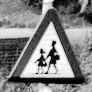

Test Label:  4
--------------------------------------
Test Image: 


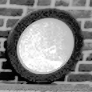

Test Label:  7
--------------------------------------
Test Image: 


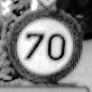

Test Label:  2
--------------------------------------
Test Image: 


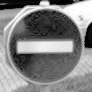

Test Label:  5
--------------------------------------
Test Image: 


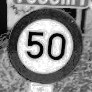

Test Label:  3
--------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
     Images Incorrectly Classified
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Test Image: 


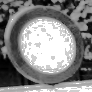

Predicted Label:  6
Actual Label:  7
--------------------------------------
Test Image: 


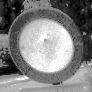

Predicted Label:  2
Actual Label:  7
--------------------------------------
Test Image: 


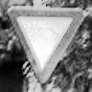

Predicted Label:  7
Actual Label:  6
--------------------------------------
Test Image: 


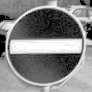

Predicted Label:  7
Actual Label:  5
--------------------------------------
Test Image: 


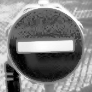

Predicted Label:  1
Actual Label:  5
--------------------------------------
Test Image: 


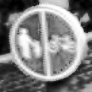

Predicted Label:  7
Actual Label:  9
--------------------------------------


In [ ]:
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("     Images Correctly Classified")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
for i in range(0,len(correct_class_im),40):
  print("Test Image: ")
  cv2_imshow(correct_class_im[i])
  print("Test Label: ",correct_class_labels[i])
  print("--------------------------------------")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("     Images Incorrectly Classified")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
for i in range(0,len(test_images_misclassified),4):
  print("Test Image: ")
  cv2_imshow(test_images_misclassified[i])
  print("Predicted Label: ",test_labels_misclassified[i])
  print("Actual Label: ",actual_labels[i])
  print("--------------------------------------")


# **Classification By Decision Trees Classifier with Fast and ORB for Feature Detection**

In [ ]:
#Training the data on Decision Tree Classifier
clf1 = DecisionTreeClassifier()
clf1.fit(im_features,np.array(y_train))

DecisionTreeClassifier()

In [ ]:
#Prediction by decision tree classifier
test_predict_classes_dt=[]
#running model on test features for predictions
for i in clf1.predict(test_features):
        test_predict_classes_dt.append(i)

In [ ]:
#Evaluation Metrics for Decision Tree Classifier
TP_dt=0
test_images_misclassified_dt=[]
test_labels_misclassified_dt=[]
actual_labels_dt=[]
correct_class_im_dt=[]
correct_class_labels_dt=[]
confusion_matrix=np.zeros((11,11))
for i in range(1,11):
  confusion_matrix[0][i]=i
  confusion_matrix[i][0]=i
for i in range(0,len(test_predict_classes_dt)):
  print("actual labels:",test_set_labels[i],"predict labels: ",test_predict_classes_dt[i])
  if(test_set_labels[i]==test_predict_classes_dt[i]):
    TP_dt+=1
    correct_class_im_dt.append(test_im[i])
    correct_class_labels_dt.append(test_predict_classes_dt[i])
  else:
    test_images_misclassified_dt.append(test_im[i])
    test_labels_misclassified_dt.append(test_predict_classes_dt[i])
    actual_labels_dt.append(test_set_labels[i])
  confusion_matrix[test_set_labels[i]][test_predict_classes_dt[i]]+=1


actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  10
actual labels:

In [ ]:
f1_dt =f1_score(test_set_labels, test_predict_classes_dt,average='macro')
#print(f1)
precision_dt = precision_score(test_set_labels, test_predict_classes_dt,average='macro')
#print(precision)
recall_dt = recall_score(test_set_labels, test_predict_classes_dt,average='macro')
print("Accuracy: ",TP_dt/len(test_predict_classes_dt)*100)
print("F1 Score: ",f1_dt)
print("Precision Score:",precision_dt)
print("Recall Score:",recall_dt)
print("Correctly Classified examples: ", TP_dt)
print("Missclassified examples: ", len(test_predict_classes_dt)-TP_dt)
print()
print()
print("     -----------------------------------------------------")
print("                      Confusion Matrix")
print("     -----------------------------------------------------")
print("Column of the matrix represents Predicted Classes")
print("Row of the matrix represents Actual Classes")
table = Texttable()
table.set_deco(Texttable.HEADER)
table.add_rows(confusion_matrix)
print(table.draw())



Accuracy:  83.5
F1 Score:  0.8337009767242325
Precision Score: 0.8415685305742852
Recall Score: 0.8350000000000002
Correctly Classified examples:  167
Missclassified examples:  33


     -----------------------------------------------------
                      Confusion Matrix
     -----------------------------------------------------
Column of the matrix represents Predicted Classes
Row of the matrix represents Actual Classes
0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1     20    0     0     0     0     0     0     0     0     0   
2     0     0     20    0     0     0     0     0     0     0   
3     0     0     20    0     0     0     0     0     0     0   
4     0     0     0     20    0     0     0     0     0     0   
5     20    0     0     0     0     0     0     0     0     0   
6     20    0     0     0     0     0     0     0     0     0   
7     19    0     1     0     0     0     0     0     0     0   
8     20    0     0     0     0     0     0    

# **Classification By AdaBoost with Fast and ORB for Feature Detection**

In [ ]:
#Training the dataset on AdaBoost Classifier
clf2=AdaBoostClassifier()
clf2.fit(im_features,np.array(y_train))

AdaBoostClassifier()

In [ ]:
#Prediction by AdaBoost Classifier
test_predict_classes_ada=[]
#running model on test features for predictions
for i in clf2.predict(test_features):
        test_predict_classes_ada.append(i)

In [ ]:
#Evaluation Metrics for AdaBoost Classifier
TP_ada=0
test_images_misclassified_ada=[]
test_labels_misclassified_ada=[]
actual_labels_ada=[]
correct_class_im_ada=[]
correct_class_labels_ada=[]
confusion_matrix=np.zeros((11,11))
for i in range(1,11):
  confusion_matrix[0][i]=i
  confusion_matrix[i][0]=i
for i in range(0,len(test_predict_classes_ada)):
  print("actual labels:",test_set_labels[i],"predict labels: ",test_predict_classes_ada[i])
  if(test_set_labels[i]==test_predict_classes_ada[i]):
    TP_ada+=1
    correct_class_im_ada.append(test_im[i])
    correct_class_labels_ada.append(test_predict_classes_ada[i])
  else:
    test_images_misclassified_ada.append(test_im[i])
    test_labels_misclassified_ada.append(test_predict_classes_ada[i])
    actual_labels_ada.append(test_set_labels[i])
  confusion_matrix[test_set_labels[i]][test_predict_classes_ada[i]]+=1


actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 10 predict labels:  1
actual labels: 10 predict labels:  1
actual labels: 10 predict labels:  1
actual labels: 10 predict labels:  1
actual labels: 10 predict labels:  1
actual labels: 10 predict labels:  1
actual labels: 10 predict labels:  1
actual labels: 10 pre

In [ ]:
f1_ada =f1_score(test_set_labels, test_predict_classes_ada,average='macro')
#print(f1)
precision_ada = precision_score(test_set_labels, test_predict_classes_ada,average='macro')
#print(precision)
recall_ada = recall_score(test_set_labels, test_predict_classes_ada,average='macro')
print("Accuracy: ",TP_ada/len(test_predict_classes_ada)*100)
print("F1 Score: ",f1_ada)
print("Precision Score:",precision_ada)
print("Recall Score:",recall_ada)
print("Correctly Classified examples: ", TP_ada)
print("Missclassified examples: ", len(test_predict_classes_ada)-TP_ada)
print()
print()
print("     -----------------------------------------------------")
print("                      Confusion Matrix")
print("     -----------------------------------------------------")
print("Column of the matrix represents Predicted Classes")
print("Row of the matrix represents Actual Classes")
table = Texttable()
table.set_deco(Texttable.HEADER)
table.add_rows(confusion_matrix)
print(table.draw())



Accuracy:  30.0
F1 Score:  0.18896977049843292
Precision Score: 0.16111016805296213
Recall Score: 0.3
Correctly Classified examples:  60
Missclassified examples:  140


     -----------------------------------------------------
                      Confusion Matrix
     -----------------------------------------------------
Column of the matrix represents Predicted Classes
Row of the matrix represents Actual Classes
0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1     20    0     0     0     0     0     0     0     0     0   
2     0     0     20    0     0     0     0     0     0     0   
3     0     0     20    0     0     0     0     0     0     0   
4     0     0     0     20    0     0     0     0     0     0   
5     20    0     0     0     0     0     0     0     0     0   
6     20    0     0     0     0     0     0     0     0     0   
7     19    0     1     0     0     0     0     0     0     0   
8     20    0     0     0     0     0     0     0     0     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Using SIFT for Feature Detection and SVM ofr Classification**

# **Training**
SIFT for Feature Extraction

In [23]:
#by using sift
descriptors=[]
keypoints=[]
y_train=[]
sift = cv2.xfeatures2d.SIFT_create()


for i in range(0,len(train_im)):
    #Using Fats to extract key points
    img=cv2.imread(train_read[0][i])
    kp, des = sift.detectAndCompute(img, None)
    #Using ORB  to find descriptors
   
    
    if(len(kp)!=0):
      #append the descriptors to the descriptors list
      descriptors.append(des)
      #append the keypoints to the keypoint list
      keypoints.append(kp)
      y_train.append(train_read[1][i])

print(len(y_train))

800


In [24]:
ds=descriptors[0]
for descriptor in descriptors[1:]:
    ds=np.vstack((ds,descriptor))

print(len(y_train))

800


In [25]:
from sklearn.cluster import KMeans
descriptors_float=ds.astype(float)
#setting number of clusters=10
k=100
voc,variance=kmeans(descriptors_float,k,1)
im_features=np.zeros((len(descriptors),k),"float32")
for i in range(len(descriptors)):
    words,distance=vq(descriptors[i],voc)
    for w in words:
        im_features[i][w]+=1

In [26]:
#fitting SVM Model on training dataset
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

In [27]:
#by using sift
des_test=[]
keypoints_test=[]
test_set_labels=[]
sift = cv2.xfeatures2d.SIFT_create()


for i in range(0,len(test_labels)):
    #Using Fats to extract key points
    img=cv2.imread(test_read[0][i])
    kp, des = sift.detectAndCompute(img, None)
    #Using ORB  to find descriptors
   
    
    if(len(kp)!=0):
      #append the descriptors to the descriptors list
      des_test.append(des)
      #append the keypoints to the keypoint list
      keypoints_test.append(kp)
      test_set_labels.append(test_labels[i])

print(len(test_set_labels))

200


In [28]:
test_ds=des_test[0]

for descriptor in des_test[1:]:
    test_ds=np.vstack((test_ds,descriptor))

In [29]:
testset_features=np.zeros((len(test_set_labels),k),"float32")
for i in range(len(test_set_labels)):
    words,distance=vq(des_test[i],voc)
    for w in words:
        testset_features[i][w]+=1

In [30]:
test_classes_predict=[]
#Using the SVM model for prediction
for i in clf.predict(testset_features):
        test_classes_predict.append(i)
        #print(test_classes_predict)

[4]
[4, 4]
[4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1]
[4, 4, 4, 4, 4, 4, 4, 1, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 2]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 2, 7]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 2, 7, 10]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 2, 7, 10, 8]
[4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 2, 7, 10, 8, 

In [31]:
#gathering material for Qualitative and Quantitative Results
TP=0
misclassified_images=[]
misclassified_labels=[]
actual_labels=[]
correctlyclass_images=[]
correctlyclass_labels=[]
confusion_matrix=np.zeros((11,11))
for i in range(1,11):
  confusion_matrix[0][i]=i
  confusion_matrix[i][0]=i
for i in range(0,len(test_classes_predict)):
  print("actual labels:",test_set_labels[i],"predict labels: ",test_classes_predict[i])
  if(test_set_labels[i]==test_classes_predict[i]):
    TP+=1
    correctlyclass_images.append(test_im[i])
    correctlyclass_labels.append(test_classes_predict[i])
  else:
    misclassified_images.append(test_classes_predict[i])
    misclassified_labels.append(test_classes_predict[i])
    actual_labels.append(test_set_labels[i])
  confusion_matrix[test_set_labels[i]][test_classes_predict[i]]+=1


actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  1
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  8
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 4 predict labels:  4
actual labels: 10 predict labels:  2
actual labels: 10 predict labels:  7
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  8
actual labels: 10 predict labels:  10
actual labels: 10 predict labels:  7
actual labels: 10 predict labels:  10
actual labels: 10 

In [32]:
f1 =f1_score(test_set_labels, test_classes_predict,average='macro')
#print(f1)
precision = precision_score(test_set_labels, test_classes_predict,average='macro')
#print(precision)
recall = recall_score(test_set_labels, test_classes_predict,average='macro')
print("Accuracy: ",TP/len(test_classes_predict)*100)
print("F1 Score: ",f1)
print("Precision Score:",precision)
print("Recall Score:",recall)
print("Correctly Classified examples: ", TP)
print("Missclassified examples: ", len(test_classes_predict)-TP)
print()
print()
print("     -----------------------------------------------------")
print("                      Confusion Matrix")
print("     -----------------------------------------------------")
print("Column of the matrix represents Predicted Classes")
print("Row of the matrix represents Actual Classes")
table = Texttable()
table.set_deco(Texttable.HEADER)
table.add_rows(confusion_matrix)
print(table.draw())



Accuracy:  64.0
F1 Score:  0.6339805717389158
Precision Score: 0.6442105263157895
Recall Score: 0.6399999999999999
Correctly Classified examples:  128
Missclassified examples:  72


     -----------------------------------------------------
                      Confusion Matrix
     -----------------------------------------------------
Column of the matrix represents Predicted Classes
Row of the matrix represents Actual Classes
0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1     7     0     0     0     1     8     1     1     0     2   
2     0     16    3     0     0     0     1     0     0     0   
3     0     2     14    0     1     1     1     1     0     0   
4     1     0     0     18    0     0     0     1     0     0   
5     0     0     0     2     7     0     5     3     1     2   
6     1     0     0     0     1     11    1     2     0     4   
7     3     0     1     1     5     0     7     0     0     3   
8     0     0     0     0     0     0     2    